In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import glob
import os
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
repo_dir = os.path.dirname(os.path.dirname(os.getcwd()))
repo_dir

'/home/walml/repos/gz-euclid-datalab'

In [58]:

import sys
sys.path.append('/home/walml/repos/gz-euclid-datalab')
from bulk_euclid.utils import morphology_utils_ou_mer as m_utils  # try to keep this exactly like ou mer version
from bulk_euclid.utils import cutout_utils

In [59]:
def get_fits_data(fits_loc):
    with fits.open(fits_loc) as hdul:
        data = hdul[0].data
        assert data.min() < data.max()
        assert np.isnan(data).mean() < 0.1
    return data


In [60]:
lens_dir = repo_dir + '/data/space_warps_colour_tests/lens_cutouts'
lens_vis_locs = glob.glob(lens_dir + '/VIS/*.fits')
lens_y_locs = glob.glob(lens_dir + '/Y/*.fits')
lens_j_locs = glob.glob(lens_dir + '/J/*.fits')
lens_h_locs = glob.glob(lens_dir + '/H/*.fits')
assert len(lens_vis_locs) == len(lens_y_locs) == len(lens_j_locs) == len(lens_h_locs)
lens_df = pd.DataFrame(data={'vis_loc': lens_vis_locs, 'y_loc': lens_y_locs, 'j_loc': lens_j_locs, 'h_loc': lens_h_locs})
lens_df['galaxy_name'] = lens_df['vis_loc'].apply(lambda x: os.path.basename(x).split('.')[0])
lens_df

vis_loc  \
0   /home/walml/repos/gz-euclid-datalab/data/space...   
1   /home/walml/repos/gz-euclid-datalab/data/space...   
2   /home/walml/repos/gz-euclid-datalab/data/space...   
3   /home/walml/repos/gz-euclid-datalab/data/space...   
4   /home/walml/repos/gz-euclid-datalab/data/space...   
..                                                ...   
76  /home/walml/repos/gz-euclid-datalab/data/space...   
77  /home/walml/repos/gz-euclid-datalab/data/space...   
78  /home/walml/repos/gz-euclid-datalab/data/space...   
79  /home/walml/repos/gz-euclid-datalab/data/space...   
80  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                y_loc  \
0   /home/walml/repos/gz-euclid-datalab/data/space...   
1   /home/walml/repos/gz-euclid-datalab/data/space...   
2   /home/walml/repos/gz-euclid-datalab/data/space...   
3   /home/walml/repos/gz-euclid-datalab/data/space...   
4   /home/walml/repos/gz-euclid-datalab/data/space...   
..                                                ...   
76  /home/walml/repos/gz-euclid-datalab/data/space...   
77  /home/walml/repos/gz-euclid-datalab/data/space...   
78  /home/walml/repos/gz-euclid-datalab/data/space...   
79  /home/walml/repos/gz-euclid-datalab/data/space...   
80  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                j_loc  \
0   /home/walml/repos/gz-euclid-datalab/data/space...   
1   /home/walml/repos/gz-euclid-datalab/data/space...   
2   /home/walml/repos/gz-euclid-datalab/data/space...   
3   /home/walml/repos/gz-euclid-datalab/data/space...   
4   /home/walml/repos/gz-euclid-datalab/data/space...   
..                                                ...   
76  /home/walml/repos/gz-euclid-datalab/data/space...   
77  /home/walml/repos/gz-euclid-datalab/data/space...   
78  /home/walml/repos/gz-euclid-datalab/data/space...   
79  /home/walml/repos/gz-euclid-datalab/data/space...   
80  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                h_loc         galaxy_name  
0   /home/walml/repos/gz-euclid-datalab/data/space...  EUC_13071_DESI-sel  
1   /home/walml/repos/gz-euclid-datalab/data/space...   EUC_5919_DESI-sel  
2   /home/walml/repos/gz-euclid-datalab/data/space...  EUC_12778_DESI-sel  
3   /home/walml/repos/gz-euclid-datalab/data/space...  EUC_13771_DESI-sel  
4   /home/walml/repos/gz-euclid-datalab/data/space...  EUC_19628_DESI-sel  
..                                                ...                 ...  
76  /home/walml/repos/gz-euclid-datalab/data/space...  EUC_21370_DESI-sel  
77  /home/walml/repos/gz-euclid-datalab/data/space...   EUC_5309_DESI-sel  
78  /home/walml/repos/gz-euclid-datalab/data/space...   EUC_5089_DESI-sel  
79  /home/walml/repos/gz-euclid-datalab/data/space...  EUC_13776_DESI-sel  
80  /home/walml/repos/gz-euclid-datalab/data/space...   EUC_6013_DESI-sel  

[81 rows x 5 columns]

In [61]:
sim_dir = repo_dir + '/data/space_warps_colour_tests/simulations_b12'

sim_subdirs = glob.glob(sim_dir + '/*')
sim_df = pd.DataFrame(data={'sim_subdir_loc': sim_subdirs})
sim_df['galaxy_name'] = sim_df['sim_subdir_loc'].apply(lambda x: x.split('/')[-1])
sim_df['vis_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_VIS.fits'
sim_df['y_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_NIR_Y.fits'
sim_df['j_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_NIR_J.fits'
sim_df['h_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_NIR_H.fits'

In [62]:
sim_df['galaxy_type'] = 'sim'
del sim_df['sim_subdir_loc']
lens_df['galaxy_type'] = 'real_lens'

df = pd.concat([sim_df, lens_df], axis=0).reset_index(drop=True)
df.sample(5)

galaxy_name  \
1180  EUC_30005_DESI-sel_r0   
1928  EUC_30601_DESI-sel_r1   
143   EUC_30534_DESI-sel_r3   
1345  EUC_30304_DESI-sel_r1   
1852  EUC_30767_DESI-sel_r0   

                                                vis_loc  \
1180  /home/walml/repos/gz-euclid-datalab/data/space...   
1928  /home/walml/repos/gz-euclid-datalab/data/space...   
143   /home/walml/repos/gz-euclid-datalab/data/space...   
1345  /home/walml/repos/gz-euclid-datalab/data/space...   
1852  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                  y_loc  \
1180  /home/walml/repos/gz-euclid-datalab/data/space...   
1928  /home/walml/repos/gz-euclid-datalab/data/space...   
143   /home/walml/repos/gz-euclid-datalab/data/space...   
1345  /home/walml/repos/gz-euclid-datalab/data/space...   
1852  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                  j_loc  \
1180  /home/walml/repos/gz-euclid-datalab/data/space...   
1928  /home/walml/repos/gz-euclid-datalab/data/space...   
143   /home/walml/repos/gz-euclid-datalab/data/space...   
1345  /home/walml/repos/gz-euclid-datalab/data/space...   
1852  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                  h_loc galaxy_type  
1180  /home/walml/repos/gz-euclid-datalab/data/space...         sim  
1928  /home/walml/repos/gz-euclid-datalab/data/space...         sim  
143   /home/walml/repos/gz-euclid-datalab/data/space...         sim  
1345  /home/walml/repos/gz-euclid-datalab/data/space...         sim  
1852  /home/walml/repos/gz-euclid-datalab/data/space...         sim

In [63]:
df['galaxy_name'].value_counts()

galaxy_name
EUC_6013_DESI-sel        1
EUC_30576_DESI-sel_r0    1
EUC_30242_DESI-sel_r3    1
EUC_30343_DESI-sel_r0    1
EUC_30203_DESI-sel_r1    1
                        ..
EUC_30391_DESI-sel_r3    1
EUC_30081_DESI-sel_r2    1
EUC_30467_DESI-sel_r1    1
EUC_30666_DESI-sel_r3    1
EUC_30570_DESI-sel_r3    1
Name: count, Length: 2479, dtype: int64

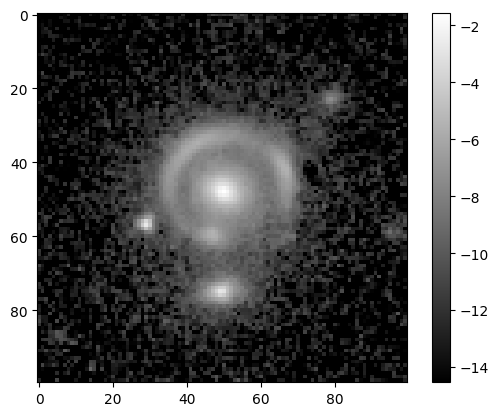

In [64]:
# try with Javier's code

from bulk_euclid.utils import image_utils_javier as jav

galaxy = df.iloc[4]
vis_im = get_fits_data(galaxy['vis_loc'])
y_im = get_fits_data(galaxy['y_loc'])
j_im = get_fits_data(galaxy['j_loc'])

im = jav.prepare_single_band(vis_im, np.log10)
plt.imshow(im, cmap='gray')


plt.colorbar()

/tmp/ipykernel_77631/666661332.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(arr[:, :, 0].flatten()), bins=100, alpha=0.5)
/tmp/ipykernel_77631/666661332.py:3: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(arr[:, :, 1].flatten()), bins=100, alpha=0.5)
/tmp/ipykernel_77631/666661332.py:4: RuntimeWarning: invalid value encountered in log10
  _=plt.hist(np.log10(arr[:, :, 2].flatten()), bins=100, alpha=0.5)


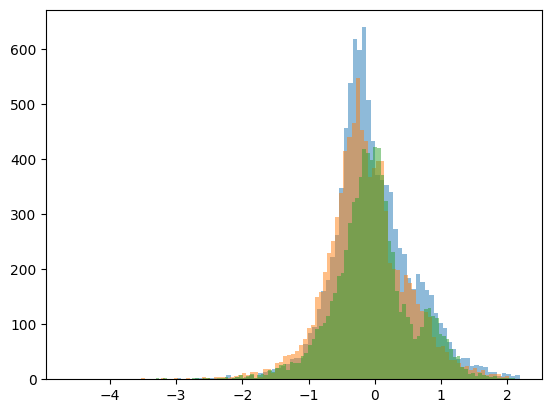

In [65]:
arr = jav.bands_to_array_via_zero_points(vis=vis_im, y=y_im, j=j_im)
plt.hist(np.log10(arr[:, :, 0].flatten()), bins=100, alpha=0.5)
plt.hist(np.log10(arr[:, :, 1].flatten()), bins=100, alpha=0.5)
_=plt.hist(np.log10(arr[:, :, 2].flatten()), bins=100, alpha=0.5)


/home/walml/repos/gz-euclid-datalab/bulk_euclid/utils/image_utils_javier.py:222: RuntimeWarning: divide by zero encountered in log10
  image = scale(image)


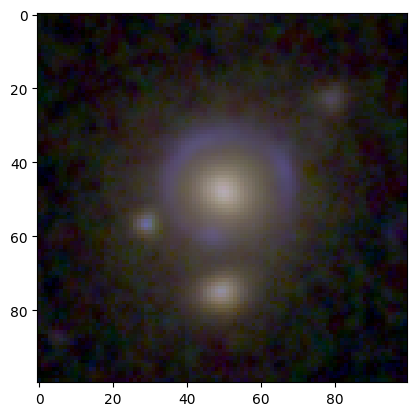

In [66]:
# plt.imshow(np.arcsinh(arr))
im = jav.prepare_composite_band(arr, np.log10)
plt.imshow(im)

In [67]:
np.log10(0.0013112159002001164 )


np.float64(-2.882325793019541)

In [68]:
np.log10( 0.3264369391823031)

np.float64(-0.4862007029349268)

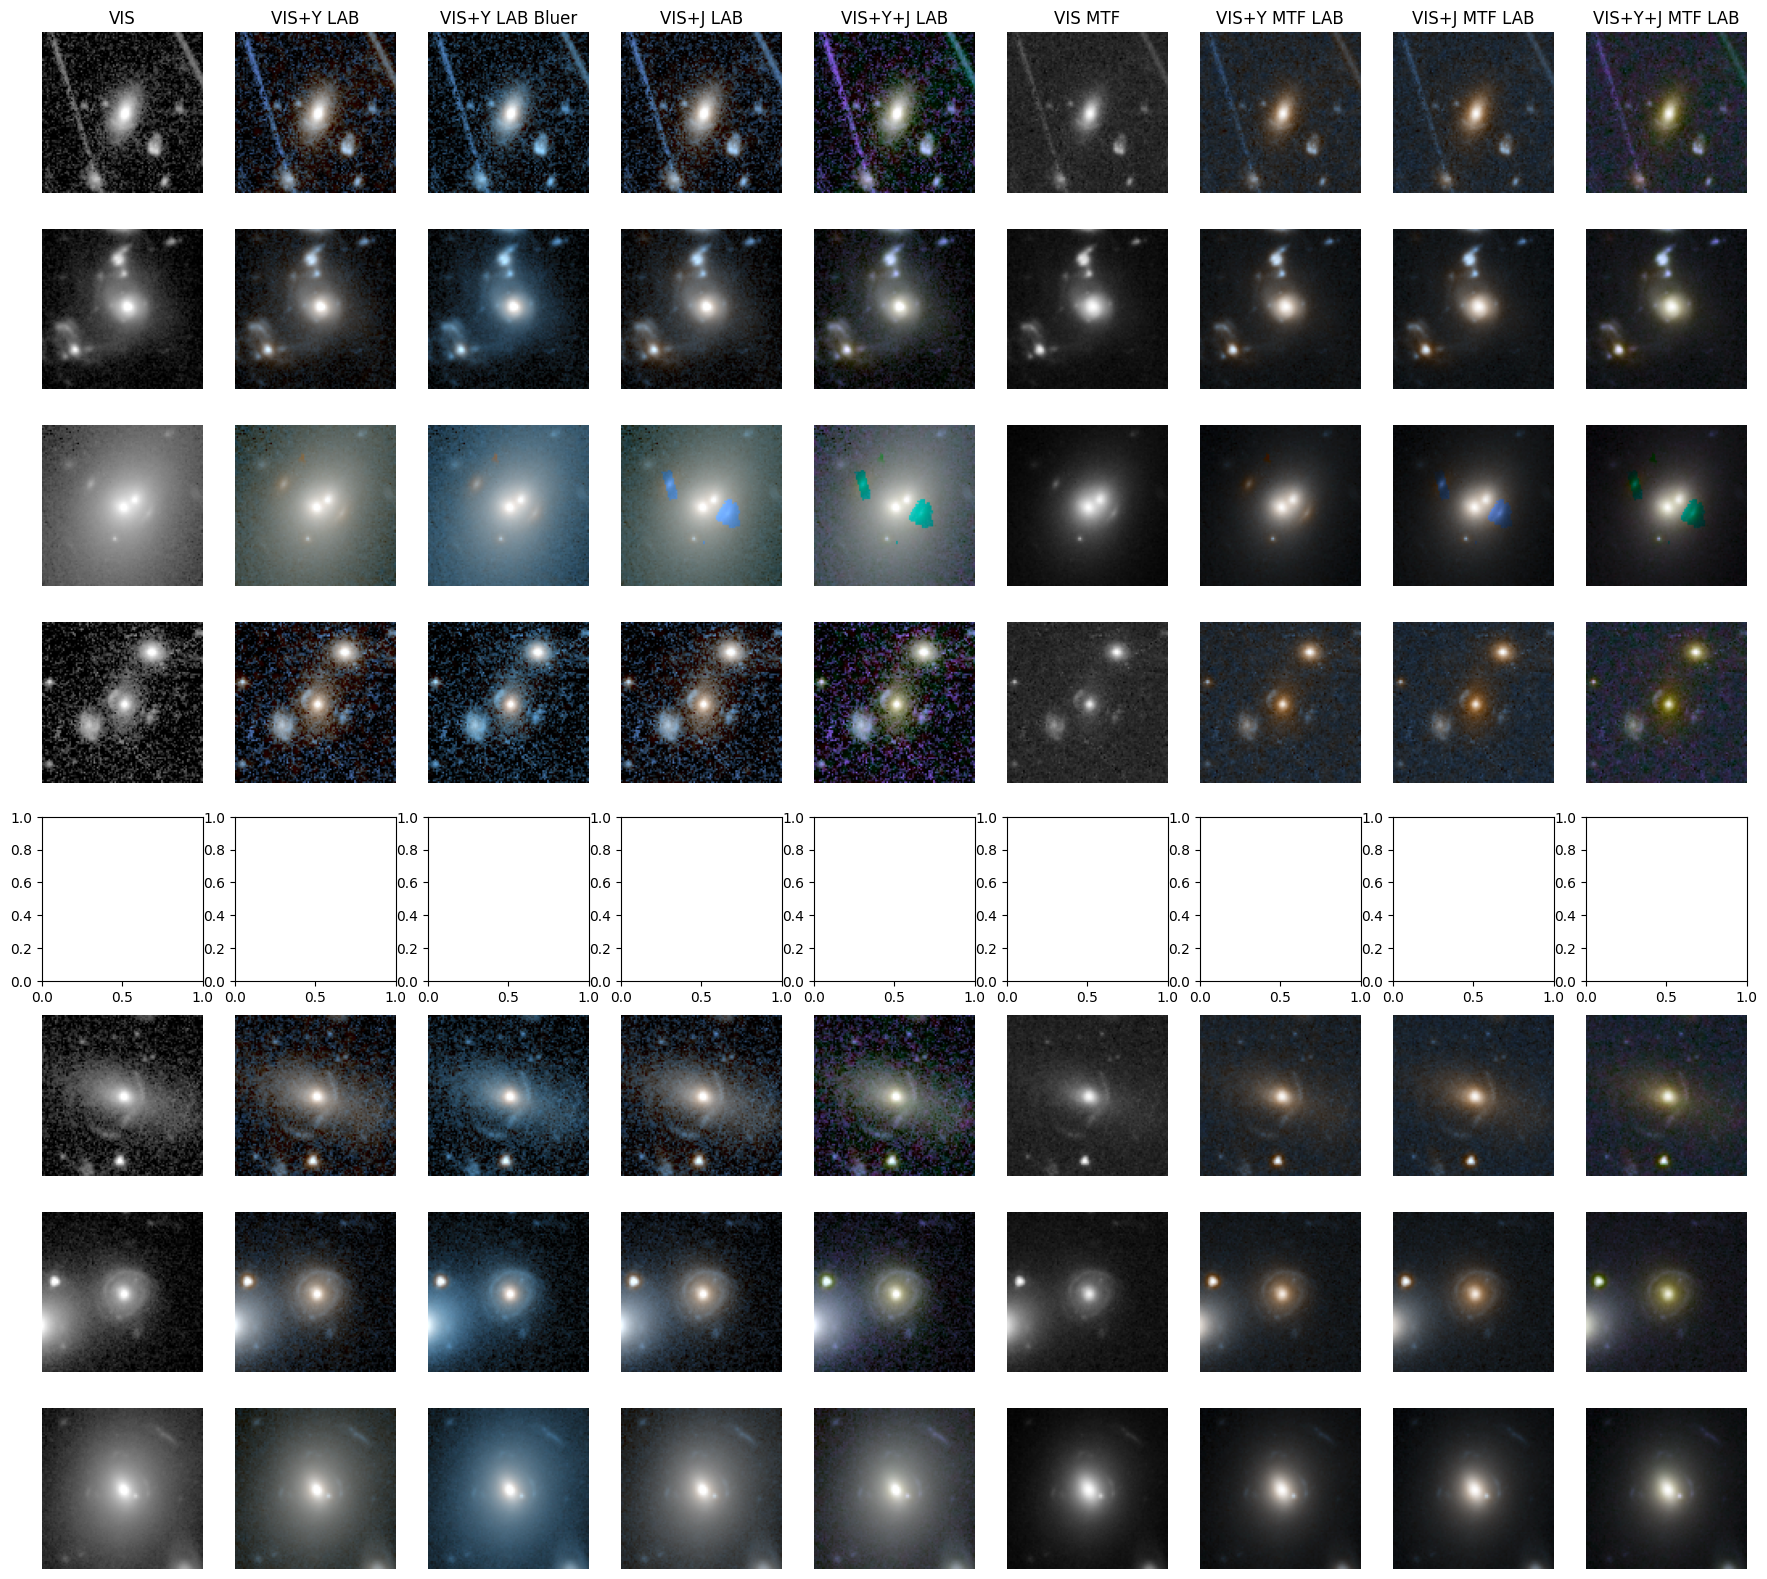

In [81]:
def show_examples(df):

    fig, axes = plt.subplots(nrows=8, ncols=9, figsize=(22, 20))

    for row_n, row in enumerate(axes):

        galaxy = df.iloc[row_n]

        try:

            vis_im = get_fits_data(galaxy['vis_loc'])
            y_im = get_fits_data(galaxy['y_loc'])
            j_im = get_fits_data(galaxy['j_loc'])
        except Exception as e:
            print(e)
            continue

        # arcsinh processing

        ax = row[0]
        vis_rgb = m_utils.make_vis_only_cutout(vis_im, q=500)
        ax.imshow(vis_rgb, cmap='gray')
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS')

        ax = row[1]
        vis_y_rgb = cutout_utils.make_composite_cutout(vis_im, y_im, vis_q=500, nisp_q=1)
        # further edit to same image
        vis_y_rgb_lab = cutout_utils.replace_luminosity_channel(vis_y_rgb.copy(), rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(vis_y_rgb_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+Y LAB')

        # bluer version
        ax = row[2]
        vis_y_rgb_blue = cutout_utils.make_composite_cutout(vis_im, y_im, vis_q=500, nisp_q=.2)
        vis_y_rgb_blue_lab = cutout_utils.replace_luminosity_channel(vis_y_rgb_blue, rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(vis_y_rgb_blue_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+Y LAB Bluer')

        ax = row[3]
        vis_j_rgb = cutout_utils.make_composite_cutout(vis_im, j_im,  vis_q=500, nisp_q=.5)
        vis_j_rgb_lab = cutout_utils.replace_luminosity_channel(vis_j_rgb, rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(vis_j_rgb_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+J LAB')

        ax = row[4]
        triple_rgb = cutout_utils.make_triple_cutout(vis_im, y_im, j_im, short_q=500, mid_q=1, long_q=0.5)
        triple_rgb_lab = cutout_utils.replace_luminosity_channel(triple_rgb, rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(triple_rgb_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+Y+J LAB')

        # MTF processing

        vis_rgb = cutout_utils.apply_MTF(vis_im)
        y_rgb = cutout_utils.apply_MTF(y_im)
        j_rgb = cutout_utils.apply_MTF(j_im)

        ax = row[5] # MTF
        ax.imshow(vis_rgb, cmap='gray')
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS MTF')

        ax = row[6]
        mean_flux = np.mean([vis_rgb, y_rgb], axis=0)
        rgb = np.stack([y_rgb, mean_flux, vis_rgb], axis=2).astype(np.uint8)
        rgb_lab = cutout_utils.replace_luminosity_channel(rgb, rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(rgb_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+Y MTF LAB')

        ax = row[7]
        mean_flux = np.mean([vis_rgb, j_rgb], axis=0)
        rgb = np.stack([j_rgb, mean_flux, vis_rgb], axis=2).astype(np.uint8)
        rgb_lab = cutout_utils.replace_luminosity_channel(rgb, rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(rgb_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+J MTF LAB')

        ax = row[8]
        rgb = np.stack([j_rgb, y_rgb, vis_rgb], axis=2).astype(np.uint8)
        rgb_lab = cutout_utils.replace_luminosity_channel(rgb, rgb_channel_for_luminosity=2, desaturate_speckles=False)
        ax.imshow(rgb_lab)
        ax.axis('off')
        if row_n == 0:
            ax.set_title('VIS+Y+J MTF LAB')

            


        # ax = row[3]
        # # further edit to same image

        # ax.imshow(vis_y_rgb_lab)
        # ax.axis('off')
        # if row_n == 0:
        #     ax.set_title('VIS Y LAB'


        # ax = row[4]
        # vis_rgb = cutout_utils.make_lsb_cutout(vis_im, stretch=20, power=0.5)
        # ax.imshow(vis_rgb, cmap='gray')
        # ax.axis('off')


        # ax = row[3]
        # vis_jav = jav.prepare_single_band(vis_im, np.log10)
        # ax.imshow(vis_jav, cmap='gray')
        # ax.axis('off')


        # ax = row[11]
        # arr = jav.bands_to_array_via_zero_points(vis=vis_im, y=y_im, j=j_im)
        # im = jav.prepare_composite_band(arr, np.log10)
        # ax.imshow(im)
        # ax.axis('off')

        # ax = row[0]
        # vis_rgb = m_utils.make_vis_only_cutout(vis_im)
        # ax.imshow(vis_rgb, cmap='gray')
        # ax.axis('off')



    return fig

real_to_show = df[df['galaxy_type'] == 'real_lens'].sample(60, random_state=3).reset_index(drop=True)
fig = show_examples(real_to_show)
fig.savefig('real_lens_examples.pdf')
# sims_to_show = df[df['galaxy_type'] == 'sim'].sample(100).reset_index(drop=True)
# fig = show_examples(sims_to_show)
# fig.savefig('sim_examples.pdf')

In [70]:
df

galaxy_name  \
0     EUC_30576_DESI-sel_r0   
1     EUC_30242_DESI-sel_r3   
2     EUC_30343_DESI-sel_r0   
3     EUC_30203_DESI-sel_r1   
4     EUC_30758_DESI-sel_r1   
...                     ...   
2474     EUC_21370_DESI-sel   
2475      EUC_5309_DESI-sel   
2476      EUC_5089_DESI-sel   
2477     EUC_13776_DESI-sel   
2478      EUC_6013_DESI-sel   

                                                vis_loc  \
0     /home/walml/repos/gz-euclid-datalab/data/space...   
1     /home/walml/repos/gz-euclid-datalab/data/space...   
2     /home/walml/repos/gz-euclid-datalab/data/space...   
3     /home/walml/repos/gz-euclid-datalab/data/space...   
4     /home/walml/repos/gz-euclid-datalab/data/space...   
...                                                 ...   
2474  /home/walml/repos/gz-euclid-datalab/data/space...   
2475  /home/walml/repos/gz-euclid-datalab/data/space...   
2476  /home/walml/repos/gz-euclid-datalab/data/space...   
2477  /home/walml/repos/gz-euclid-datalab/data/space...   
2478  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                  y_loc  \
0     /home/walml/repos/gz-euclid-datalab/data/space...   
1     /home/walml/repos/gz-euclid-datalab/data/space...   
2     /home/walml/repos/gz-euclid-datalab/data/space...   
3     /home/walml/repos/gz-euclid-datalab/data/space...   
4     /home/walml/repos/gz-euclid-datalab/data/space...   
...                                                 ...   
2474  /home/walml/repos/gz-euclid-datalab/data/space...   
2475  /home/walml/repos/gz-euclid-datalab/data/space...   
2476  /home/walml/repos/gz-euclid-datalab/data/space...   
2477  /home/walml/repos/gz-euclid-datalab/data/space...   
2478  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                  j_loc  \
0     /home/walml/repos/gz-euclid-datalab/data/space...   
1     /home/walml/repos/gz-euclid-datalab/data/space...   
2     /home/walml/repos/gz-euclid-datalab/data/space...   
3     /home/walml/repos/gz-euclid-datalab/data/space...   
4     /home/walml/repos/gz-euclid-datalab/data/space...   
...                                                 ...   
2474  /home/walml/repos/gz-euclid-datalab/data/space...   
2475  /home/walml/repos/gz-euclid-datalab/data/space...   
2476  /home/walml/repos/gz-euclid-datalab/data/space...   
2477  /home/walml/repos/gz-euclid-datalab/data/space...   
2478  /home/walml/repos/gz-euclid-datalab/data/space...   

                                                  h_loc galaxy_type  
0     /home/walml/repos/gz-euclid-datalab/data/space...         sim  
1     /home/walml/repos/gz-euclid-datalab/data/space...         sim  
2     /home/walml/repos/gz-euclid-datalab/data/space...         sim  
3     /home/walml/repos/gz-euclid-datalab/data/space...         sim  
4     /home/walml/repos/gz-euclid-datalab/data/space...         sim  
...                                                 ...         ...  
2474  /home/walml/repos/gz-euclid-datalab/data/space...   real_lens  
2475  /home/walml/repos/gz-euclid-datalab/data/space...   real_lens  
2476  /home/walml/repos/gz-euclid-datalab/data/space...   real_lens  
2477  /home/walml/repos/gz-euclid-datalab/data/space...   real_lens  
2478  /home/walml/repos/gz-euclid-datalab/data/space...   real_lens  

[2479 rows x 6 columns]

In [71]:
# from omegaconf import OmegaConf

# cfg_dict = dict(
#     jpg_outputs=[
#         'sw_arcsinh_vis_only', 'sw_arcsinh_vis_y', 'sw_arcsinh_vis_j', 'sw_arcsinh_vis_y_j', 
#         'sw_mtf_vis_only', 'sw_mtf_vis_y', 'sw_mtf_vis_j', 'sw_mtf_vis_y_j'
#     ],
#     overwrite_jpg=True,
#     jpg_quality=100,
#     use_fits_origin_for_jpg=True
# )
# cfg = OmegaConf.create(cfg_dict)  # easy to access with cfg.base_dir, etc


# def save_examples(df: pd.DataFrame, save_dir: str):
#     for _, galaxy in df.iterrows():
#         save_loc = save_dir + '/' + galaxy['galaxy_name'] + '.jpg'  # .jpg -> vis_only.jpg, etc
#         try:
#             vis_im = get_fits_data(galaxy['vis_loc'])
#             y_im = get_fits_data(galaxy['y_loc'])
#             j_im = get_fits_data(galaxy['j_loc'])
#         except Exception as e:
#             print(e)
#             continue

#         cutout_utils.save_jpg_cutouts(cfg, save_loc, vis_im, y_im, j_im)

# save_dir = repo_dir + '/data/space_warps_colour_tests/coloured'
# real_to_show = df[df['galaxy_type'] == 'real_lens'].reset_index(drop=True)
# _ = save_examples(real_to_show, save_dir+'/real_lens')

# sims_to_show = df[df['galaxy_type'] == 'sim'].sample(500, random_state=42).reset_index(drop=True)
# _ = save_examples(sims_to_show, save_dir+'/sim')

In [72]:
from skimage.filters import unsharp_mask
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma
)

ModuleNotFoundError: No module named 'skimage'

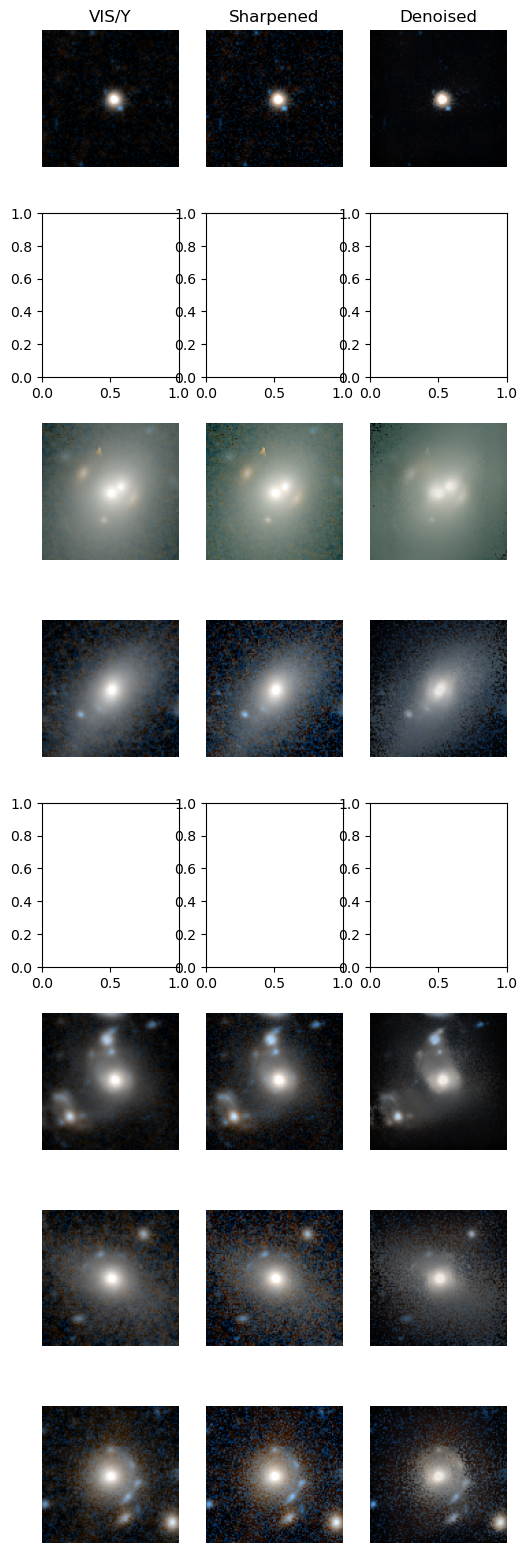

In [ ]:


fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(6, 20))

for row_n, row in enumerate(axes):

    galaxy = real_to_show.sample(len(real_to_show)).iloc[row_n]

    try:

        vis_im = get_fits_data(galaxy['vis_loc'])
        y_im = get_fits_data(galaxy['y_loc'])
        j_im = get_fits_data(galaxy['j_loc'])
    except Exception as e:
        print(e)
        continue

    ax = row[0]
    vis_y_rgb = cutout_utils.make_composite_cutout(vis_im, y_im, vis_q=500, nisp_q=1)
    ax.imshow(vis_y_rgb)
    ax.axis('off')

    ax = row[1]
    rgb_sharp = unsharp_mask(vis_y_rgb, radius=1, amount=1)
    ax.imshow(rgb_sharp)
    ax.axis('off')

    ax = row[2]
    rgb_denoised = denoise_bilateral(rgb_sharp, sigma_color=0.05, sigma_spatial=5, channel_axis=-1)
    ax.imshow(rgb_denoised)
    ax.axis('off')


    if row_n == 0:
        row[0].set_title('VIS/Y')
        row[1].set_title('Sharpened')
        row[2].set_title('Denoised')
    #     row[3].set_title('VIS LSB')
    #     row[4].set_title('VIS/Y Q=500')
    #     row[5].set_title('VIS/Y, low Y, Q=500')
    #     row[6].set_title('VIS/Y/J, Q=500')
    #     row[7].set_title('VIS/J, Q=500')
    #     row[8].set_title('VIS ERO')


